# Исследование объявлений о продаже квартир

**В нашем распоряжении данные сервиса Яндекc Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Цель исследования -  определить рыночную стоимость объектов недвижимости. Для этого нужно провести исследовательский анализ данных и установить параметры, влияющие на цену объектов.**

**По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта и других объектов — эти данные автоматически получены из геосервисов. Количество парков и водоёмов также заполняется без участия пользователя.**

**Описание данных**
- airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
- balcony — число балконов
- ceiling_height — высота потолков (м)
- cityCenters_nearest — расстояние до центра города (м)
- days_exposition — сколько дней было размещено объявление (от публикации до снятия)
- first_day_exposition — дата публикации
- floor — этаж
- floors_total — всего этажей в доме
- is_apartment — апартаменты (булев тип)
- kitchen_area — площадь кухни в квадратных метрах (м²)
- last_price — цена на момент снятия с публикации
- living_area — жилая площадь в квадратных метрах (м²)
- locality_name — название населённого пункта
- open_plan — свободная планировка (булев тип)
- parks_around3000 — число парков в радиусе 3 км
- parks_nearest — расстояние до ближайшего парка (м)
- ponds_around3000 — число водоёмов в радиусе 3 км
- ponds_nearest — расстояние до ближайшего водоёма (м)
- rooms — число комнат
- studio — квартира-студия (булев тип)
- total_area — общая площадь квартиры в квадратных метрах (м²)
- total_images — число фотографий квартиры в объявлении

**Последовательность выполнения проекта**

**Шаг 1. Открыть файл с данными и изучить общую информацию.**
- Загрузите данные из csv-файла в датафрейм.
- Изучить общую информацию о полученном датафрейме.
- Построить гистограмму для всех числовых столбцов таблицы на одном графике.

**Шаг 2. Выполните предобработку данных**
- Найти и изучить пропущенные значения в столбцах.
- Определить, в каких столбцах есть пропуски.
- Заполните пропущенные значения там, где это возможно.
- Изучить типы данных в столбцах и изменить их при необходимости.
- Изучите уникальные значения, устраните неявные дубликаты.

**Шаг 3. Добавить в таблицу новые столбцы со следующими параметрами:**
- цена одного квадратного метра;
- день недели публикации объявления;
- месяц публикации объявления;
- год публикации объявления;
- тип этажа квартиры;
- расстояние до центра города в километрах.

**Шаг 4. Провести исследовательский анализ данных.**
- Изучить перечисленные ниже параметры объектов и построить отдельные гистограммы для каждого из них:
 - общая площадь;
 - жилая площадь;
 - площадь кухни;
 - цена объекта;
 - количество комнат;
 - высота потолков;
 - тип этажа квартиры;
 - общее количество этажей в доме;
 - расстояние до центра города в метрах;
 - расстояние до ближайшего парка.
- Изучить, как быстро продавались квартиры, построить гистограмму, посчитать среднее и медиану.
- Определите факторы, которые больше всего влияют на стоимость объекта. Изучить, зависит ли цена от:
 - общей площади;
 - жилой площади;
 - площади кухни;
 - количества комнат;
 - этажа, на котором расположена квартира;
 - даты размещения (день недели, месяц, год).
- Построить графики, которые покажут зависимость цены от указанных выше параметров.
- Посчитать среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Построить сводную таблицу с количеством объявлений и средней ценой квадратного метра для этих населенных пунктов. Выделить населённые пункты с самой высокой и низкой стоимостью квадратного метра.
- Вычислить среднюю стоимость квартир в Санкт-Петербурге на разном удалении от центра, учитывая каждый километр расстояния, построить график изменения средней цены.

**Шаг 5. Написать общий вывод**

### Откроем файл с данными и изучим общую информацию

**Импортируем библиотеку pandas. Считаем данные из csv-файла в датафрейм, в качестве разделителя укажем знак табуляции `\t` и сохраним в переменную `data`. Путь к файлу:**

`/datasets/real_estate_data.csv`

In [1]:
import pandas as pd

data = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t')

**Выведем первые 20 строчек датафрейма data на экран.**

In [2]:
data.head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


**Выведем основную информацию о датафрейме с помощью метода info().**

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

**Построим гистограммы для всех числовых значений столбцов таблицы на одном графике**

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

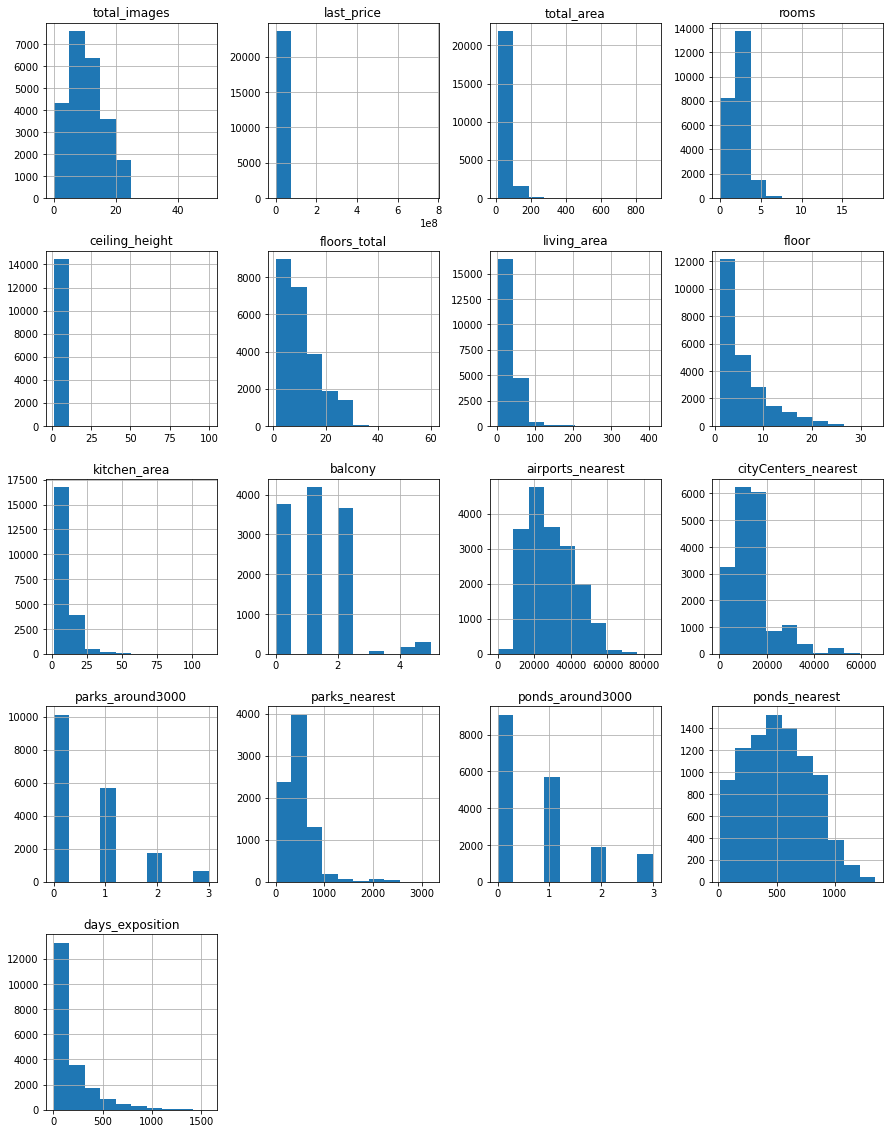

In [4]:
data.hist(figsize=(15, 20))

**На этом шаге данные считаны из файла и сохранены в переменную `data`. Данные содержат 23699 строк и 22 столбца, столбцы имеют разный тип данных `int`, `float`, `object`, `bool`.** 

**В данных имеются пропуски.**

**Построили гистограммы, показывающие распределение, для всех числовых значений датафрейма.**

### Выполним предобработку данных

**Название столбца `cityCenters_nearest`, `parks_around3000`, `ponds_around3000`, в отличие от всех остальных, не в `snake_case`, исправим это.**

In [5]:
data = data.rename(
    columns = {'cityCenters_nearest' : 'city_centers_nearest', 
    'parks_around3000' : 'parks_around_3000', 
    'ponds_around3000' : 'ponds_around_3000'}
)

**Найдем количество пропущенных значений для каждого столбца**

In [6]:
data.isna().sum().sort_values()

total_images                0
open_plan                   0
floor                       0
rooms                       0
studio                      0
total_area                  0
last_price                  0
first_day_exposition        0
locality_name              49
floors_total               86
living_area              1903
kitchen_area             2278
days_exposition          3181
ponds_around_3000        5518
parks_around_3000        5518
city_centers_nearest     5519
airports_nearest         5542
ceiling_height           9195
balcony                 11519
ponds_nearest           14589
parks_nearest           15620
is_apartment            20924
dtype: int64

**Найдем также относительное количество пропущенных значений для каждого столбца (в процентах).**

In [7]:
round(data.isnull().sum().sort_values()/ len(data)*100, 2)

total_images             0.00
open_plan                0.00
floor                    0.00
rooms                    0.00
studio                   0.00
total_area               0.00
last_price               0.00
first_day_exposition     0.00
locality_name            0.21
floors_total             0.36
living_area              8.03
kitchen_area             9.61
days_exposition         13.42
ponds_around_3000       23.28
parks_around_3000       23.28
city_centers_nearest    23.29
airports_nearest        23.38
ceiling_height          38.80
balcony                 48.61
ponds_nearest           61.56
parks_nearest           65.91
is_apartment            88.29
dtype: float64

**Прежде, чем удалять данные из датафрейма, сохраним изначальный объем данных (количество строк) в переменную `rows_before` и будем по ней контролировать долю, оставшихся после удаления данных.**

In [8]:
rows_before = data.shape[0]
rows_before

23699

**Удалим строки с пропусками в столбце `floors_total`, т.к они составляют менее 0,5% данных, и заменим пропуски в столбце `balcony` на `0`, т.к. можем предположить, что если количество балконов не указано продавцом, то скорее всего оно равно 0.
После этого еще раз оценим количество пропусков.**

In [9]:
data = data.dropna(subset=['floors_total'])
data['balcony'] = data['balcony'].fillna(0)
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9118
floors_total                0
living_area              1870
floor                       0
is_apartment            20838
studio                      0
open_plan                   0
kitchen_area             2231
balcony                     0
locality_name              48
airports_nearest         5532
city_centers_nearest     5509
parks_around_3000        5508
parks_nearest           15568
ponds_around_3000        5508
ponds_nearest           14552
days_exposition          3172
dtype: int64

**Проверим, какая часть данных осталась после предыдущей операции. Для этого напишим функцию и будем применять ее в дальнейшем. Если после выполнения операции в данных остается более 90% от изначальных данных, это не окажет значительного влияния на результаты исследования.**

In [10]:
def rows_range(dataframe):
    rows_after = data.shape[0]
    rows_range = round(rows_after / rows_before * 100, 2)
    print('После выполнения предыдущей операции в датафрейме осталось', \
          str(rows_range) + '%', 'данных от изначального датафрейма.')
rows_range(data)

После выполнения предыдущей операции в датафрейме осталось 99.64% данных от изначального датафрейма.


**В данных много пропусков, связанных с локациями квартир. Поскольку эти данные заполнялись автоматически на основе картографических данных, можно предположить, что эти пропуски связны с алгоритмами заполнения, самими картографическими данными и т.п. Эти данные мы не можем заменить, но также не можем и удалить, оставляем эти пропуски. Также оставляем пропуски в столбце `days_exposition`, они скорее всего возникли в процессе заполнения, т.к. этот столбец заполнялся продавцами.**

**Также много пропусков в столбце `is_apartment`. Проверим, какие вообще есть значения в этом столбце.**

In [11]:
data['is_apartment'].value_counts()

False    2725
True       50
Name: is_apartment, dtype: int64

**Логично предположить, что, если продавец явно не указал, что его объект недвижимости является апартаментами, то это квартира. Заменим пропуски в этом столбце на значение `False`.**

In [12]:
data['is_apartment'] = data['is_apartment'].fillna(False)

**Пропуски в столбцах `living_area` и `kitchen_area` скорее всего связаны с ошибками при заполнени, т.к. эти данные также вносились продавцами. Доля пропусков значительна - около 10%, при этом в более важном параметре, влияющем на цену, `total_area` пропусков нет. Удаление этих данных на данном этапе не целесообразно.**

**Около 40% данных имеет пропуски в столбце `ceiling_height`, причина скорее всего опять же в ошибке при заполнении. Их можно заполнить медианным значением высоты потолка, но для этого нужно сначала проверить параметр на наличие выбросов. Построим диагарамму распределения.**

array([[<AxesSubplot:title={'center':'ceiling_height'}>]], dtype=object)

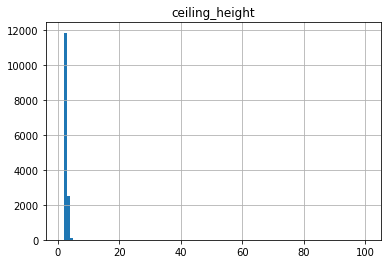

In [13]:
data.hist('ceiling_height', bins=100)

**В данных явно есть выбросы, но значения больше 5 м. встречаются редко. Проверим уникальные значения в столбце.**

In [14]:
data['ceiling_height'].unique()

array([  2.7 ,    nan,   3.03,   2.5 ,   2.67,   2.56,   3.05,   2.75,
         2.6 ,   2.9 ,   2.8 ,   2.55,   3.  ,   2.65,   3.2 ,   2.61,
         3.25,   3.45,   2.77,   2.85,   2.64,   2.57,   4.15,   3.5 ,
         3.3 ,   2.71,   4.  ,   2.47,   2.73,   2.84,   3.1 ,   2.34,
         3.4 ,   3.06,   2.72,   2.54,   2.51,   2.78,   2.76,  25.  ,
         2.58,   3.7 ,   2.52,   5.2 ,   2.87,   2.66,   2.59,   2.  ,
         2.45,   3.6 ,   2.92,   3.11,   3.13,   3.8 ,   3.15,   3.55,
         3.16,   3.62,   3.12,   2.53,   2.74,   2.96,   2.46,   5.3 ,
         5.  ,   2.79,   2.95,   4.06,   2.94,   3.82,   3.54,   3.53,
         2.83,   4.7 ,   2.4 ,   3.38,   3.01,   5.6 ,   3.65,   3.9 ,
         3.18,   3.35,   2.3 ,   3.57,   2.48,   2.62,   2.82,   3.98,
         2.63,   3.83,   3.52,   3.95,   3.75,   2.88,   3.67,   3.87,
         3.66,   3.85,   3.86,   4.19,   3.24,   4.8 ,   4.5 ,   4.2 ,
         3.36,  32.  ,   3.08,   3.68,   3.07,   3.37,   3.09,   8.  ,
      

**Можно допустить, что максимальная высота потолков у продаваемых объектов 8 м., но в данных встречаются значения и более 8 м., скорее всего это ошибки при заполнении, отбросим их как выбросы и посчитаем медианное значение в полученном датафрейме, округлим его до одного знака после запятой.**

In [15]:
data_filtred=data.query('ceiling_height <= 8')
ceiling_height_median = data_filtred['ceiling_height'].median().round(1)
ceiling_height_median

2.6

**Высота потолков 2.6 метра является вполне достоверной. Заменим выбросы в данных и заполним пропуски в столбце `ceiling_height` исходного датафрейма медианным значением `ceiling_height_median`.**

In [16]:
data.loc[data['ceiling_height'] > 8.0] = ceiling_height_median
data['ceiling_height'] = data['ceiling_height'].fillna(ceiling_height_median)

In [17]:
rows_range(data)

После выполнения предыдущей операции в датафрейме осталось 99.64% данных от изначального датафрейма.


**Проверим количество пропусков в данных после всех преобразований**

In [18]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area              1870
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2226
balcony                     0
locality_name              48
airports_nearest         5523
city_centers_nearest     5500
parks_around_3000        5499
parks_nearest           15550
ponds_around_3000        5499
ponds_nearest           14535
days_exposition          3166
dtype: int64

**Все пропуски, которые можно было заменить или удалить, обработаны**

**Рассмотрим типы данных в каждом столбце. Стобец `first_day_exposition` имеет формат `object`, но содержит даты, нужно поменять тип данных на `datetime`, чтобы было удобно работать с датами. Столбец `is_apartment` имеет тип данных `object`, но содержит булевы значения, нужно поменять тип данных на `bool`. Столбцы `floors_total` и `balcony` имеют тип данных `float`, нужно поменять на `int`, т.к. количество этажей в доме и балконов может быть только целым числом.**

In [19]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

In [20]:
data['is_apartment'] = data['is_apartment'].astype('bool', errors='raise')

In [21]:
data['floors_total'] = data['floors_total'].astype('int', errors='raise')

In [22]:
data['balcony'] = data['balcony'].astype('int', errors='raise')

**Проверим типы данных после изменения**

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23613 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23613 non-null  float64       
 1   last_price            23613 non-null  float64       
 2   total_area            23613 non-null  float64       
 3   first_day_exposition  23613 non-null  datetime64[ns]
 4   rooms                 23613 non-null  float64       
 5   ceiling_height        23613 non-null  float64       
 6   floors_total          23613 non-null  int64         
 7   living_area           21743 non-null  float64       
 8   floor                 23613 non-null  float64       
 9   is_apartment          23613 non-null  bool          
 10  studio                23613 non-null  object        
 11  open_plan             23613 non-null  object        
 12  kitchen_area          21387 non-null  float64       
 13  balcony         

**Теперь все типы данных соответствуют содержанию столбцов**

**Проверим данные на неличие явных дубликатов**

In [24]:
data.duplicated().sum()

25

**Явные дубликаты отсутствуют. Проверим наличие неявных дубликатов в столбце с названиями населенных пунктов.**

In [25]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

**Проверим количество уникальных значений**

In [26]:
len(data['locality_name'].unique())

365

**В данных присутствуют неявные дубликаты. Заменим все типы населенных пунктов в данных на `поселок`. Также исключим возникновение дубликатов, связанное с написанием букв `е` и `ё`.**

In [27]:
data['locality_name'] = (
    data['locality_name'].str.replace('ё', 'е')
    .replace(['городской поселок', 'поселок городского типа', 'садовое товарищество',
    'садоводческое некоммерческое товарищество','коттеджный поселок', 'деревня',
    'поселок станции', 'поселок при железнодорожной станции', '^село'], 'поселок',
    regex=True)
)

**Проверим данные на наличие дубликатов после изменений, также узнаем новое количество уникальных значений**

In [28]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'поселок Шушары', 'поселок Янино-1',
       'поселок Парголово', 'поселок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'поселок Кудрово', 'Коммунар', 'Колпино',
       'поселок Красный Бор', 'Гатчина', 'поселок Федоровское', 'Выборг',
       'Кронштадт', 'Кировск', 'поселок Новое Девяткино',
       'поселок Металлострой', 'поселок Лебяжье', 'поселок Сиверский',
       'поселок Молодцово', 'поселок Кузьмоловский',
       'поселок Новая Ропша', 'Павловск', 'поселок Пикколово',
       'Всеволожск', 'Волхов', 'Кингисепп', 'Приозерск', 'Сестрорецк',
       'поселок Куттузи', 'поселок Аннино', 'поселок Ефимовский',
       'поселок Плодовое', 'поселок Заклинье', 'поселок Торковичи',
       'поселок Первомайское', 'Красное Село', 'поселок Понтонный',
       'Сясьстрой', 'поселок Старая', 'поселок Лесколово',
       'поселок Новый Свет', 'Сланцы', 'поселок Путилово', 'Ивангород',
       'Мурино', 'Шлиссельбург', 'Никольское', 'Зеленогорск',
       'С

In [29]:
len(data['locality_name'].unique())

309

**Данные очищены от дубликатов**

**На этом этапе проведена предобработка данных. Исправлены названия столбцов, где это необходмо.**

**Изучены пропуски данных. Где это возможно, пропуски удалены или заменены.**

**Типы данных столбцов преведены в соответствие с их содержанием.**

**Проверено наличие дубликатов в данных. Явные дубликаты отсутствуют, неявные дубликаты устранены.**

### Добавим в таблицу новые столбцы

**Добавим в таблицу столбец с ценой одного квадратного метров (с точностью до двух знаков после запятой).**

In [30]:
data['square_meter_price'] = round(data['last_price'] / data['total_area'], 2)

**Добавим в таблицу столбец с днем публикации объявления (0 - понедельник, 1 - вторниик и т.д.).**

In [31]:
data['first_exposition_weekday'] = data['first_day_exposition'].dt.weekday

**Добавим в таблицу столбец с месяцем публикации объявления.**

In [32]:
data['first_exposition_month'] = data['first_day_exposition'].dt.month

**Добавим в таблицу столбец с годом публикации объявления.**

In [33]:
data['first_exposition_year'] = data['first_day_exposition'].dt.year

**Добавим в таблицу столбец с тип этажа квартиры (значения — «первый», «последний», «другой»).**

In [34]:
def floor_group(row):
    floor = row['floor']
    floors_total = row['floors_total']
    if floor == 1:
        return 'первый'
    elif floor == floors_total:
        return 'последний'
    return 'другой'

data['floor_group'] = data.apply(floor_group, axis=1)

**Добавим в таблицу столбец с расстоянием до центра города в километрах (с точностью до целых значений).**

In [35]:
data['city_centers_nearest_km'] = round(data['city_centers_nearest'] / 1000, 0)

**Посмотрим датафрейм после внесения новых столбцов**

In [36]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,square_meter_price,first_exposition_weekday,first_exposition_month,first_exposition_year,floor_group,city_centers_nearest_km
0,20.0,13000000.0,108.0,2019-03-07,3.0,2.70,16,51.0,8.0,False,...,482.0,2.0,755.0,NaN,120370.37,3,3,2019,другой,16.0
1,7.0,3350000.0,40.4,2018-12-04,1.0,2.60,11,18.6,1.0,False,...,NaN,0.0,NaN,81.0,82920.79,1,12,2018,первый,19.0
2,10.0,5196000.0,56.0,2015-08-20,2.0,2.60,5,34.3,4.0,False,...,90.0,2.0,574.0,558.0,92785.71,3,8,2015,другой,14.0
3,0.0,64900000.0,159.0,2015-07-24,3.0,2.60,14,NaN,9.0,False,...,84.0,3.0,234.0,424.0,408176.10,4,7,2015,другой,7.0
4,2.0,10000000.0,100.0,2018-06-19,2.0,3.03,14,32.0,13.0,False,...,112.0,1.0,48.0,121.0,100000.00,1,6,2018,другой,8.0


**На этом этапе добавили в датафрейм новые столбцы с данными о цене одного квадратного метра, дне, месяце и годе публикации объявления, а также о типе этажа квартиры и расстоянии до центра города в километрах.**

### Проведем исследовательский анализ данных

**Построим гистограмму для общей площади квартиры**

array([[<AxesSubplot:title={'center':'total_area'}>]], dtype=object)

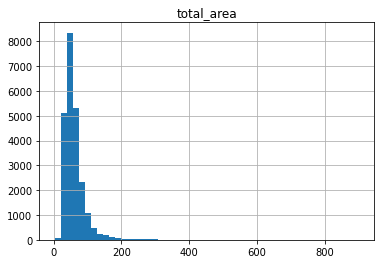

In [37]:
data.hist('total_area', bins=50)

**Удалим редкие значения (более 200 кв.м.) и проверим, какя доля данных останется в датафрейме.**

In [38]:
data = data.query('total_area <= 200')
rows_range(data)

После выполнения предыдущей операции в датафрейме осталось 98.68% данных от изначального датафрейма.


**Рассмотрим данные на отрезке от 25 до 100 кв.м., увеличив число корзин до 100.**

array([[<AxesSubplot:title={'center':'total_area'}>]], dtype=object)

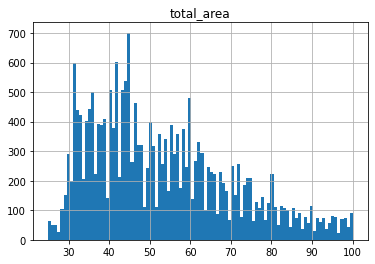

In [39]:
data.hist('total_area', bins=100, range=(25, 100))

**Данное распределение тяготеет к нормальному, хотя и имеет несколько выбивающихся значений. На гистограмме видно, что больше всего квартир продается площадью от 28 до 80 кв.м. Есть несколько пиков между 32 и 60 кв.м. Максимум находится в районе 45 кв.м.**

**Расчитаем среднее и медианное значения для этого параметра, округлим их до двух знаков после запятой.**

In [40]:
total_area_mean = data['total_area'].mean().round(2)
total_area_median = data['total_area'].median().round(2)
print(f'Седнее значение общей площади квартры равно {total_area_mean} м.')
print(f'Медианное значение общей площади квартры равно {total_area_median} м.')

Седнее значение общей площади квартры равно 58.12 м.
Медианное значение общей площади квартры равно 51.7 м.


**Построим гистограмму для жилой площади квартир**

array([[<AxesSubplot:title={'center':'living_area'}>]], dtype=object)

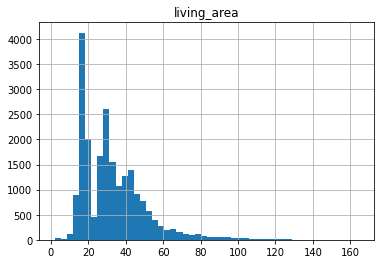

In [41]:
data.hist('living_area', bins=50)

**Удалим редкие значения (более 130 кв.м.) и проверим, какя доля данных останется в датафрейме.**

In [42]:
data = data.query('living_area <= 130')
rows_range(data)

После выполнения предыдущей операции в датафрейме осталось 90.84% данных от изначального датафрейма.


**Рассмотрим данные на отрезке от 10 до 60 кв.м., увеличив число корзин до 100.**

array([[<AxesSubplot:title={'center':'living_area'}>]], dtype=object)

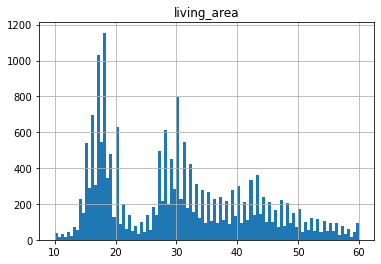

In [43]:
data.hist('living_area', bins=100, range = (10, 60))

**Такое распределение нельзя назвать нормальным, т.к. на гистограмме явно выделяется два пика в районе значений 18 и 30 кв.м. В целом характер распределения связан с наличием квартир с разным количеством комнат.**

**Расчитаем среднее и медианное значения для этого параметра, округлим их до двух знаков после запятой.**

In [44]:
living_area_mean = data['living_area'].mean().round(2)
living_area_median = data['living_area'].median().round(2)
print(f'Седнее значение жилой площади квартры равно {living_area_mean} м.')
print(f'Медианное значение жилой площади квартры равно {living_area_median} м.')

Седнее значение жилой площади квартры равно 33.14 м.
Медианное значение жилой площади квартры равно 30.0 м.


**Построим гистограмму для площади кухни**

array([[<AxesSubplot:title={'center':'kitchen_area'}>]], dtype=object)

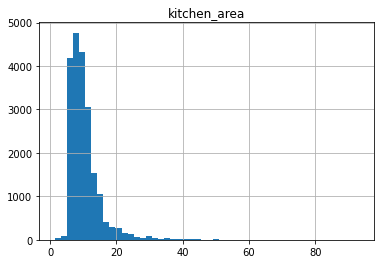

In [45]:
data.hist('kitchen_area', bins = 50)

**Отбросим, но не будем удалять из датафрейма редкие значения. Рассмотрим данные на отрезке от 5 до 20 кв.м.**

array([[<AxesSubplot:title={'center':'kitchen_area'}>]], dtype=object)

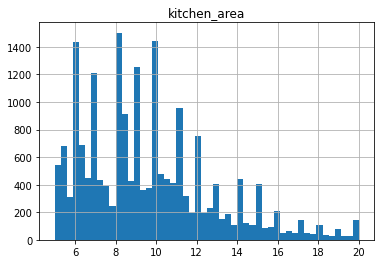

In [46]:
data.hist('kitchen_area', bins = 50, range = (5, 20))

**Это распределение тоже нельзя назвать нормальным. На гистограмме выделяются несколько пиков, но наибольшее количество квартир имеет площадь кухни от 6 до 12 кв.м. В целом характер распределения отражает площади кухонь в типовых планировках жилых домов.**

**Расчитаем среднее и медианное значения для этого параметра, округлим их до двух знаков после запятой.**

In [47]:
kitchen_area_mean = data['kitchen_area'].mean().round(2)
kitchen_area_median = data['kitchen_area'].median().round(2)
print(f'Седнее значение площади кухни равно {kitchen_area_mean} м.')
print(f'Медианное значение площади кухни равно {kitchen_area_median} м.')

Седнее значение площади кухни равно 10.32 м.
Медианное значение площади кухни равно 9.0 м.


**Построим гистограмму для цены объекта.**

array([[<AxesSubplot:title={'center':'last_price'}>]], dtype=object)

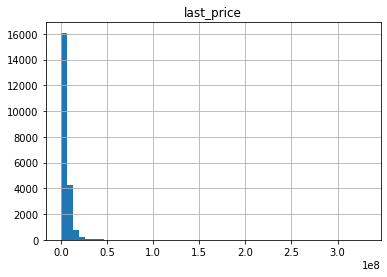

In [48]:
data.hist('last_price', bins=50)

**Удалим редкие значения (более 40 млн.р.) и проверим, какя доля данных останется в датафрейме.**

In [49]:
data = data.query('last_price <= 40000000')
rows_range(data)

После выполнения предыдущей операции в датафрейме осталось 90.52% данных от изначального датафрейма.


**Рассмотрим данные на отрезке от 0 до 15 млн.р., увеличив число корзиндо 100.**

array([[<AxesSubplot:title={'center':'last_price'}>]], dtype=object)

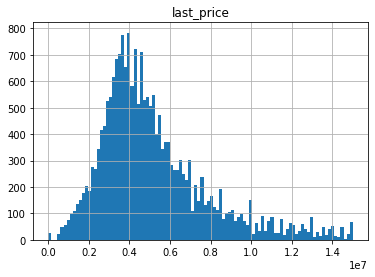

In [50]:
data.hist('last_price', bins=100, range=(0, 15000000))

**На гистограмме мы видим нормальное распределение, хотя оно и имеет "хвост" в положительную сторону. Гистограмма иллюстрирует, что большая часть квартир продается по цене от 2 до 6 млн.р. Максимальная частота находится на уровне 4 млн.р.**

**Расчитаем среднее и медианное значения для этого параметра, округлим их до двух знаков после запятой.**

In [51]:
last_price_mean = data['last_price'].mean().round(2)
last_price_median = data['last_price'].median().round(2)
print(f'Седнее значение цены объекта равно {last_price_mean} р.')
print(f'Медианное значение цены объекта равно {last_price_median} р.')

Седнее значение цены объекта равно 5773457.4 р.
Медианное значение цены объекта равно 4600000.0 р.


**Построим гистограмму для количества комнат.**

array([[<AxesSubplot:title={'center':'rooms'}>]], dtype=object)

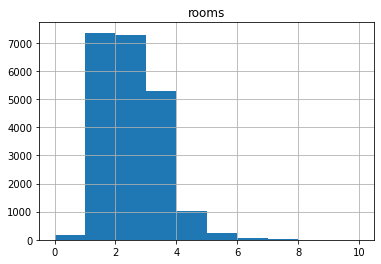

In [52]:
data.hist('rooms', bins=10, range=(0, 10))

**Удалим редкие значения (более 8 комнат) и проверим, какя доля данных останется в датафрейме.**

In [53]:
data = data.query('rooms <= 8')
rows_range(data)

После выполнения предыдущей операции в датафрейме осталось 90.51% данных от изначального датафрейма.


**Рассмотрим данные на отрезке от 1 до 5 комнат.**

array([[<AxesSubplot:title={'center':'rooms'}>]], dtype=object)

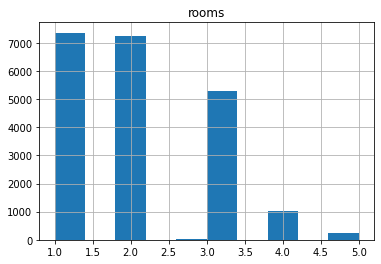

In [54]:
data.hist('rooms', bins=10, range=(1, 5))

**Это распределение тоже можно назвать нормальным. Гистограмма отражает, что больше всего продается одно- и двухкомнатных квартир, примерно на четверть меньше трехкомнатных, количество продаваемых четырех- и пятикомнатных квартир незначительно.**

**Расчитаем среднее и медианное значения для этого параметра, округлим их до двух знаков после запятой.**

In [55]:
rooms_mean = data['rooms'].mean().round(2)
rooms_median = data['rooms'].median().round(2)
print(f'Седнее значение количества комнат равно {rooms_mean}.')
print(f'Медианное значение количества комнат равно {rooms_median}.')

Седнее значение количества комнат равно 2.03.
Медианное значение количества комнат равно 2.0.


**Построим гистограмму для высоты потолков.**

array([[<AxesSubplot:title={'center':'ceiling_height'}>]], dtype=object)

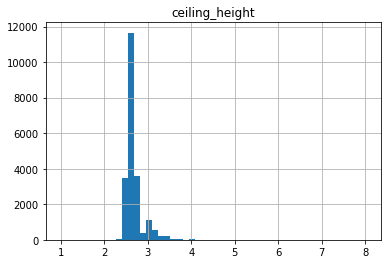

In [56]:
data.hist('ceiling_height', bins=50)

**Этот параметр был очищен от выбросов на одном из предыдущих этапов. Распределение можно считать нормальным. На гистограмме видно, что высота потолков в большинстве квартир от 2,5 до 3 метров, что соответствует типовым планировкам квартир в жилых домах.**

**Расчитаем среднее и медианное значения для этого параметра, округлим их до двух знаков после запятой.**

In [57]:
ceiling_height_mean = data['ceiling_height'].mean().round(2)
ceiling_height_median = data['ceiling_height'].median().round(2)
print(f'Седнее значение высоты потолков равно {ceiling_height_mean} м.')
print(f'Медианное значение высоты потолков равно {ceiling_height_median} м.')

Седнее значение высоты потолков равно 2.67 м.
Медианное значение высоты потолков равно 2.6 м.


**Построим гистограмму для типа этажа квартиры.**

<AxesSubplot:xlabel='floor_group'>

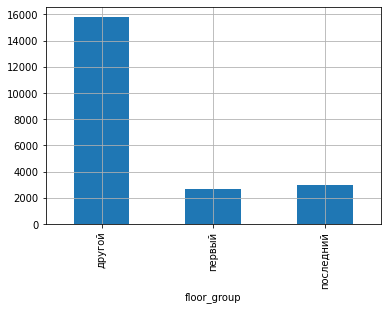

In [58]:
floor_group_count = data.groupby('floor_group')['floor_group'].count()
floor_group_count.plot(x='floor_group', kind='bar', grid=True)

**На графике видно, что большая часть квартир продается не на первом или последнем этаже.**

**Построим гистограмму для общего количества этажей в доме.**

array([[<AxesSubplot:title={'center':'floors_total'}>]], dtype=object)

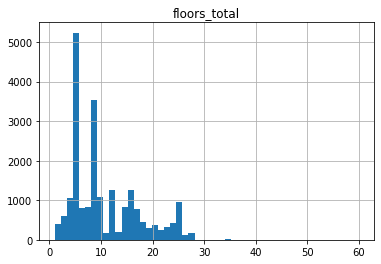

In [59]:
data.hist('floors_total', bins=50)

**Удалим редкие данные (более 30 этажей) и проверим, какая доля данных останется в датафрейме.**

In [60]:
data = data.query('floors_total <= 30')
rows_range(data)

После выполнения предыдущей операции в датафрейме осталось 90.39% данных от изначального датафрейма.


**Рассмотрим данные еще раз, увеличив число корзин до 100.**

array([[<AxesSubplot:title={'center':'floors_total'}>]], dtype=object)

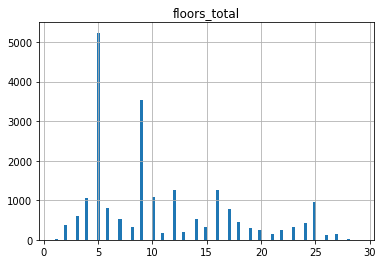

In [61]:
data.hist('floors_total', bins=100)

**Распределение имеет несколько пиков. На гистограмме видно, что большая часть квартир продается в пяти- и девятиэтажных домах, также есть пики на уровне десяти-, двенадцати-, шестнадцати- и двадцатипятиэтажных домов, что соответствует типовым проектам жилых домов.**

**Расчитаем среднее и медианное значения для этого параметра, округлим их до двух знаков после запятой.**

In [62]:
floors_total_mean = data['floors_total'].mean().round(2)
floors_total_median = data['floors_total'].median().round(2)
print(f'Седнее значение общего количества этажей в доме равно {floors_total_mean}.')
print(f'Медианное значение общего количества этажей в доме равно {floors_total_median}.')

Седнее значение общего количества этажей в доме равно 10.66.
Медианное значение общего количества этажей в доме равно 9.0.


**Построим гистограмму для расстояния до центра города в метрах.**

array([[<AxesSubplot:title={'center':'city_centers_nearest'}>]],
      dtype=object)

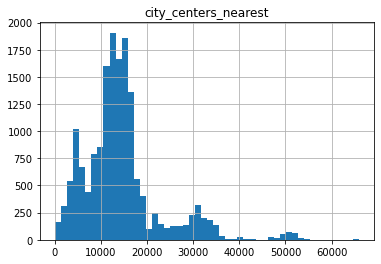

In [63]:
data.hist('city_centers_nearest', bins=50)

**Отбросим, но не будем удалять из датафрейма, редкие значения (более 20000 м.) и увеличим количесто корзин.**

array([[<AxesSubplot:title={'center':'city_centers_nearest'}>]],
      dtype=object)

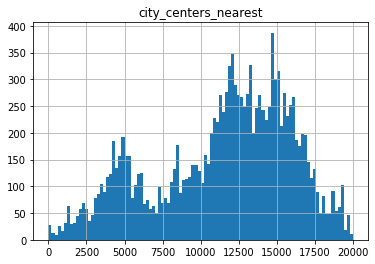

In [64]:
data.hist('city_centers_nearest', bins=100, range=(0, 20000))

**Распределение имеет несколько пиков. На гистограмме видно, что большая часть квартир, у которых отражен этот параметр, продаются на расстоянии от 12000 до 15000 м. от центра города.**

**Расчитаем среднее и медианное значения для этого параметра, округлим их до двух знаков после запятой.**

In [65]:
city_centers_nearest_mean = data['city_centers_nearest'].mean().round(2)
city_centers_nearest_median = data['city_centers_nearest'].median().round(2)
print(f'Седнее значение расстояния до центра города равно {city_centers_nearest_mean} м.')
print(f'Медианное значение расстояния до центра города равно {city_centers_nearest_median} м.')

Седнее значение расстояния до центра города равно 14331.58 м.
Медианное значение расстояния до центра города равно 13166.0 м.


**Построим гистограмму для расстояния до ближайшего парка.**

array([[<AxesSubplot:title={'center':'parks_nearest'}>]], dtype=object)

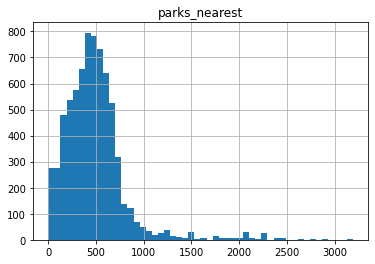

In [66]:
data.hist('parks_nearest', bins=50)

**Отбросим, но не будем удалять из датафрейма, редкие значения (более 1000 м.) и увеличим количество корзин.**

array([[<AxesSubplot:title={'center':'parks_nearest'}>]], dtype=object)

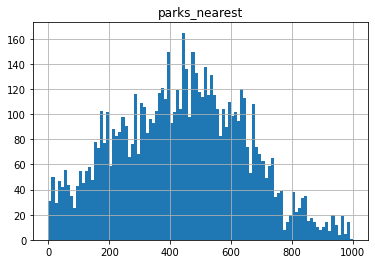

In [67]:
data.hist('parks_nearest', bins=100, range=(0, 1000))

**Данный параметр имеет нормальное распределение, пик - в районе 500 м. (для квартир, у которых этот параметр заполнен).**

**Расчитаем среднее и медианное значения для этого параметра, округлим их до двух знаков после запятой.**

In [68]:
parks_nearest_mean = data['parks_nearest'].mean().round(2)
parks_nearest_median = data['parks_nearest'].median().round(2)
print(f'Седнее значение расстояния до ближайшего парка равно {parks_nearest_mean} м.')
print(f'Медианное значение расстояния до ближайшего парка равно {parks_nearest_median} м.')

Седнее значение расстояния до ближайшего парка равно 488.52 м.
Медианное значение расстояния до ближайшего парка равно 454.0 м.


**Изучим, как быстро продавались квартиры. Построим гистограмму для количества дней размещения объявления.**

array([[<AxesSubplot:title={'center':'days_exposition'}>]], dtype=object)

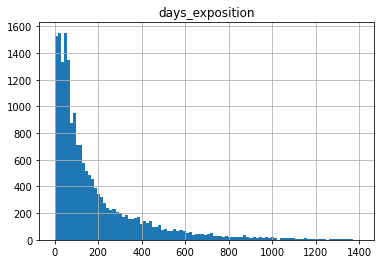

In [69]:
data.hist('days_exposition', bins=100, range=(0, 1400))

**Большая часть квартир были проданы менее, чем за 200 дней. Размещение объявлений более 700 дней является редким. В то же время есть объявления, которые были размещены 1400 дней и более, хотя их количество и крайне мало.**

**Посчитаем среднее значение для этого параметра.**

In [70]:
days_exposition_mean = round(data['days_exposition'].mean(), 0)
days_exposition_mean

183.0

**Посчитаем медианное значение для этого параметра.**

In [71]:
days_exposition_median = round(data['days_exposition'].median(), 0)
days_exposition_median

100.0

**Разница между средним и медианным значением значительна (среднее больше медианного почти в два раза). Это обусловлено наличием такого длинного "хвоста" в данных в положительном напралении. Чтобы определить, какие продажи можносчитать быстрыми, а какие медленными, посмотрим значения отклонения и квартилей.**

In [72]:
print(data['days_exposition'].describe())

count    18525.000000
mean       183.079762
std        219.517449
min          1.000000
25%         44.000000
50%        100.000000
75%        236.000000
max       1580.000000
Name: days_exposition, dtype: float64


**Отклонение в данных большое, что подтверждает их высокую неоднородность**

**Что касается скорости продаж: четверть квартир было продано за 44 дня и меньше (первый квартиль) - это быстрые продажи. Еще четверть квартир были проданы в срок от 44 до 100 дней (второй квартирль) - это нормальные продажи. Следующая четверть квартир были продны за срок от 100 до 236 дней (третий квартиль) - долгие продажи. Оставшаяся часть объявлений, последняя четверть - более 236 дней (четвертый квартиль) - это крайне долгие продажи.**

**Определим факторы, которые больше всего влияют на общую (полную) стоимость объекта.**

**Изучим зависимость цены от нескольких параметров.**

**Изучим зависимость цены от общей площади. Построим диаграмму рассеяния и рассчитаем коэффициент корреляции.**

Коэффициент корреляции равен 0.77


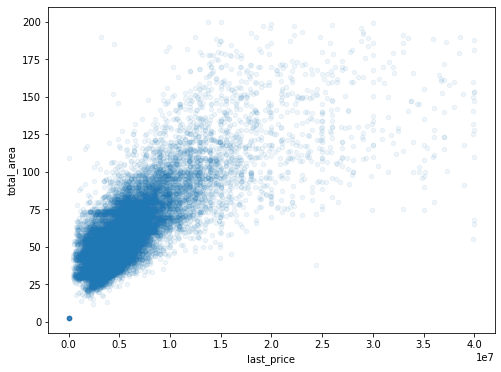

In [73]:
data.plot(x='last_price', y='total_area', kind='scatter', alpha=0.07, figsize=(8,6))
corrcoef = data['last_price'].corr(data['total_area'])
print('Коэффициент корреляции равен', corrcoef.round(2))

**Изучим зависимость цены от жилой площади. Построим диаграмму рассеяния и рассчитаем коэффициент корреляции.**

Коэффициент корреляции равен 0.66


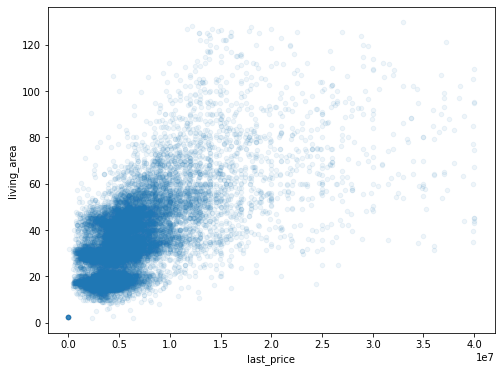

In [74]:
data.plot(x='last_price', y='living_area', kind='scatter', alpha=0.07, figsize=(8, 6))
corrcoef = data['last_price'].corr(data['living_area'])
print('Коэффициент корреляции равен', corrcoef.round(2))

**Изучим зависимость цены от площади кухни. Построим диаграмму рассеяния и рассчитаем коэффициент корреляции.**

Коэффициент корреляции равен 0.59


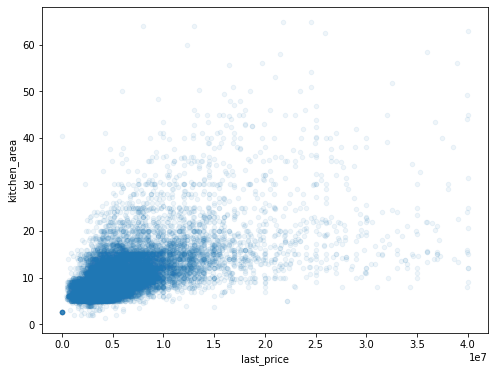

In [75]:
data.plot(x='last_price', y='kitchen_area', kind='scatter', alpha=0.07, figsize=(8, 6))
corrcoef = data['last_price'].corr(data['kitchen_area'])
print('Коэффициент корреляции равен', corrcoef.round(2))

**Изучим зависимость цены от количества комнат. Сгруппируем данные по количеству комнат, рассчитаем медианную цену и построим график зависимости. Также рассчитаем коэффициент корреляции.**

Коэффициент корреляции равен 0.48


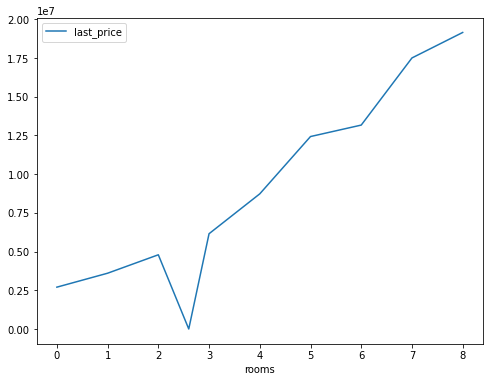

In [76]:
price_rooms = data.pivot_table(index='rooms', values='last_price', aggfunc='median')
price_rooms.plot(kind='line', figsize=(8, 6))
corrcoef = data['last_price'].corr(data['rooms'])
print('Коэффициент корреляции равен', corrcoef.round(2))

**Изучим зависимость цены от от этажа, на котором расположена квартира (первый, последний, другой). Сгруппируем данные по количеству столбцу `floor_group`, рассчитаем медианную цену и построим график зависимости.**

<AxesSubplot:xlabel='floor_group'>

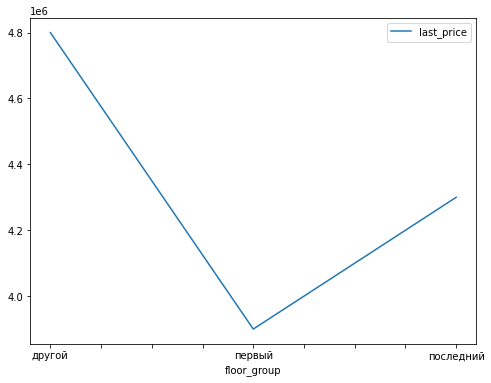

In [77]:
price_floor_group = data.pivot_table(index='floor_group', values='last_price', aggfunc='median')
price_floor_group.plot(kind='line', figsize=(8, 6))

**Изучим зависимость цены от дня недели размещения объявления. Сгруппируем данные по дню недели, рассчитаем медианную цену и построим график зависимости.**

<AxesSubplot:xlabel='first_exposition_weekday'>

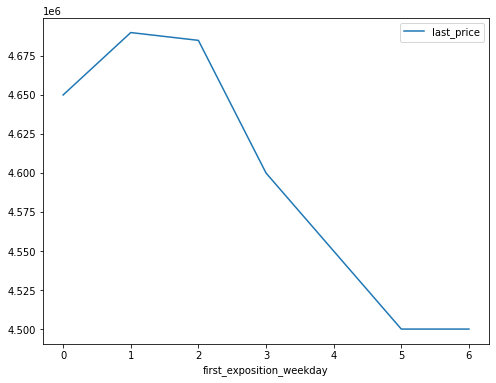

In [78]:
price_weekday = data.pivot_table(index='first_exposition_weekday', values='last_price', aggfunc='median')
price_weekday.plot(kind='line', figsize=(8, 6))

**Изучим зависимость цены от месяца размещения объявления. Сгруппируем данные по месяцу, рассчитаем медианную цену и построим график зависимости.**

<AxesSubplot:xlabel='first_exposition_month'>

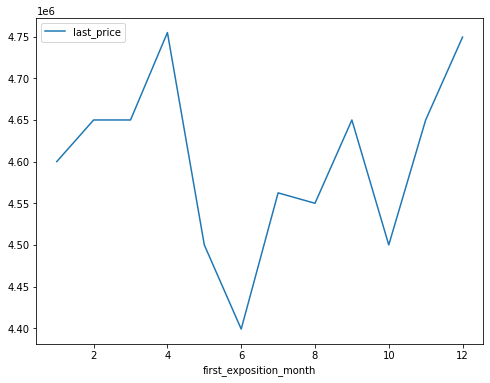

In [79]:
price_month = data.pivot_table(index='first_exposition_month', values='last_price', aggfunc='median')
price_month.plot(kind='line', figsize=(8, 6))

**Изучим зависимость цены от года размещения объявления. Сгруппируем данные по году, рассчитаем медианную цену и построим график зависимости.**

<AxesSubplot:xlabel='first_exposition_year'>

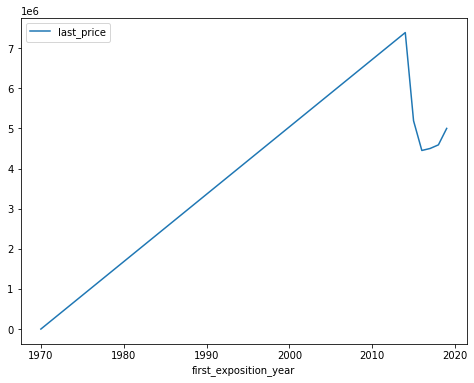

In [80]:
price_year = data.pivot_table(index='first_exposition_year', values='last_price', aggfunc='median')
price_year.plot(kind='line', figsize=(8, 6))

**В данных есть выбросы. Проверим, какие значения есть в столбце `first_exposition_year`.**

In [81]:
data['first_exposition_year'].unique()

array([2019, 2018, 2015, 2017, 2016, 2014, 1970])

**Значения года `1970` - явная ошибка. Заменим их на `2014`.**

In [82]:
data.loc[data['first_exposition_year'] == 1970] = 2014

**Построим график зависимости еще раз.**

<AxesSubplot:xlabel='first_exposition_year'>

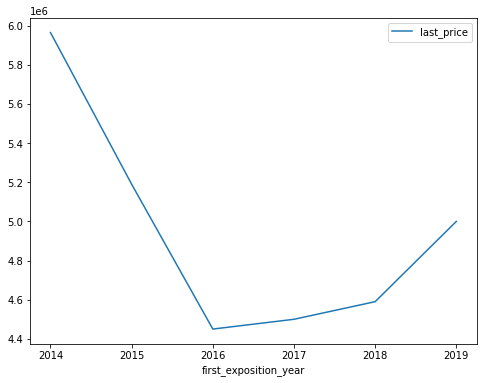

In [83]:
price_year = data.pivot_table(index='first_exposition_year', values='last_price', aggfunc='median')
price_year.plot(kind='line', figsize=(8, 6))

**На основании изученных данных, можно сделать вывод, что на общую цену объекта больше всего влияют общая и жилая площади, коэффициенты корреляции этих параметров с ценой 0.77 и 0.66 соответственно. Меньше, но все же значительно, цена зависит от площади кухни и количества комнат. Коэффициенты корреляции 0.59 и 0.48 соответственно. Зависимость цены от этажа (первый, последний, другой) и даты размещения объявления (день недели, месяц, год) незначительна.**

**Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений.**

**Для начала найдем 10 населенных пунктов с наибольшим числом объявлений.**

In [84]:
locations = data.pivot_table(index='locality_name', values='last_price', aggfunc='count')
locations = locations.sort_values(by='last_price', ascending=False)
locations.head(15)

,last_price
locality_name,
Санкт-Петербург,14210
поселок Мурино,490
поселок Шушары,403
Всеволожск,371
Пушкин,340
Колпино,327
поселок Парголово,301
Гатчина,291
поселок Кудрово,262


**Топ 10 населенных пунктов по количеству продаваемых объектов замыкает Петергоф (197 объявлений о продаже). Отбросим остальные населенные пункты и сохраним список в отдельную переменную `top_ten_locations`.**

In [85]:
top_ten_locations = locations.query('last_price >= 197')
top_ten_locations

,last_price
locality_name,
Санкт-Петербург,14210
поселок Мурино,490
поселок Шушары,403
Всеволожск,371
Пушкин,340
Колпино,327
поселок Парголово,301
Гатчина,291
поселок Кудрово,262


**Выберем из данных населенные пункты, которые есть в `top_ten_locations`, посчитаем среднюю цену одного метра в этих населенных пунктах и построим сводную таблицу с количеством объявлений и средней ценой квадратного метра для этих населенных пунктов.**

In [86]:
top_ten_locations_full = data.query('locality_name in @top_ten_locations.index')
top_ten_locations_sq_m = top_ten_locations_full.pivot_table(index='locality_name', values='square_meter_price', aggfunc=['count', 'mean'])
top_ten_locations_sq_m.columns = ['objects_number', 'square_meter_price_mean']
top_ten_locations_sq_m.sort_values('square_meter_price_mean')

,objects_number,square_meter_price_mean
locality_name,,
Гатчина,291,68639.081890
Всеволожск,371,68880.130943
Колпино,327,75249.775443
поселок Шушары,403,78749.640695
Петергоф,197,84480.969848
поселок Мурино,490,86281.993041
поселок Парголово,301,90442.586645
поселок Кудрово,262,92702.184313
Пушкин,340,103429.422853


**Как видно из сводной таблицы, самая низкая цена квадратного метра среди 10 населенных пунктов с самым большим количеством объявлений в Гатчине - 68639.08 р./кв.м., а самая высокая - в Санкт-Петербурге - 111159.17 р./кв.м.**

**Вычислим среднюю стоимость квартир в Санкт-Петербурге на разном удалении от центра города на основании известных нам данных о расстоянии от объекта до центра города в километрах. Построим график изменения средней цены для каждого километра удаления от центра Санкт-Петербурга.**

<AxesSubplot:xlabel='city_centers_nearest_km'>

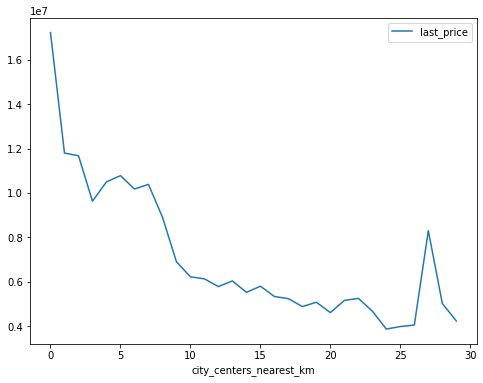

In [87]:
location_spb = data.query('locality_name == "Санкт-Петербург"')
location_spb_center = location_spb.pivot_table(index='city_centers_nearest_km', values='last_price', aggfunc='mean')
location_spb_center.plot(kind='line', figsize=(8, 6))

**Как видно на графике, цена ожидаемо снижается с увеличением расстояния от центра города, хотя и не линейно, на графике есть несколько "выбросов", самый очевидный из которых - в районе 27 км. от центра. Максимальная цена - в непосредственной близости от центра - ок. 17 млн.р., минимальная - на расстоянии 25-30 км. от центра - 4-5 млн. р.**

### Напишем общий вывод

**В ходе работы над проектом исходные данные были получены из csv-файла и сохранены в переменной. Была получена основная информация о датафреме. Для первичной оценки были построены гистограммы, показывающие распределение, для всех числовых значений датафрейма.**

**Была проведена предобработка данных:**
- **исправлены названия столбцов, где это необходмо;**
- **изучены и, где это возможно, удалены или заменены пропуски данных;**
- **типы данных столбцов преведены в соответствие с их содержанием;**
- **проверено наличие дубликатов в данных, явные дубликаты отсутствовали, неявные дубликаты были устранены.**

**На следующем этапе в датафрейм были добавлены новые столбцы с необходимыми для дальнейшей работы данными о цене одного квадратного метра, дне, месяце и годе публикации объявления, а также о типе этажа квартиры и расстоянии до центра города в километрах.**

**Далее были изучены следующие параметры объектов:**
- **общая площадь;**
- **жилая площадь;**
- **площадь кухни;**
- **цена объекта;**
- **количество комнат;**
- **высота потолков;**
- **тип этажа квартиры («первый», «последний», «другой»);**
- **общее количество этажей в доме;**
- **расстояние до центра города в метрах;**
- **расстояние до ближайшего парка.**

**Были построены отдельные гистограммы для каждого из этих параметров. В некоторых параметрах были обнаружены редкие и выбивающиеся значения. Там, где это было возможно и целесообразно, они были удалены.**

**Также было изучено, как быстро продавались квартиры, была построена гистограмма для количества дней размещения объявления о продаже квартиры, рассчитаны средние и медианные значения этого параметра. На основании этих данных было определено сколько времени обычно занимает продажа и сделан вывод, что продажу квартиры в срок менее 44 дней можно считать быстрой, а более 236 дней — крайне долгой.**

**На следующем этапе была изучена зависимость цены от нескольких параметров, были построены диагарммы рассеяния или графики зависимости, рассчитаны коэффициенты корреляции. На основании полученных данных были сделаны выводы, что на общую цену объекта влияют общая и жилая площади, площади кухни и количества комнат. Коэффициенты корреляции этих параметров с ценой 0.77, 0.66, 0.59 и 0.48 соответственно. А зависимость цены от этажа (первый, последний, другой) и даты размещения объявления (день недели, месяц, год) незначительна.**

**Кроме этого была построена сводная таблица и определена самая низкая и самая высокая цена квадратного метра среди населенных пунктов с самым большим количеством объявлений. Самая низкая цена в Гатчине - 68639.08 р./кв.м., а самая высокая - в Санкт-Петербурге - 111159.17 р./кв.м. А также вычислена средняя стоимость квартир в Санкт-Петербурге на разном удалении от центра города и построен соответствующий график изменения средней цены для каждого километра удаления от центра.**

***Чек-лист готовности проекта***

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Файл с данными открыт.
- [x]  Файл с данными изучен: выведены первые строки, использован метод `info()`, построены гистограммы.
- [x]  Найдены пропущенные значения.
- [x]  Пропущенные значения заполнены там, где это возможно.
- [x]  Объяснено, какие пропущенные значения обнаружены.
- [x]  В каждом столбце установлен корректный тип данных.
- [x]  Объяснено, в каких столбцах изменён тип данных и почему.
- [x]  Устранены неявные дубликаты в названиях населённых пунктов.
- [x]  Обработаны редкие и выбивающиеся значения (аномалии).
- [x]  В таблицу добавлены новые параметры:
       – цена одного квадратного метра;
       – день публикации объявления (0 - понедельник, 1 - вторник и т. д.);
       – месяц публикации объявления;
       – год публикации объявления;
       – тип этажа квартиры (значения — «первый», «последний», «другой»);
       – расстояние до центра города в километрах.
- [x]  Изучены и описаны параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего парка.
- [x]  Выполнено задание «Изучите, как быстро продавались квартиры (столбец `days_exposition`)»:
    - построена гистограмма;
    - рассчитаны среднее и медиана;
    - описано, сколько обычно занимает продажа и указано, какие продажи можно считать быстрыми, а какие — необычно долгими.
- [x]  Выполнено задание «Определите факторы, которые больше всего влияют на общую (полную) стоимость объекта». Построены графики, которые показывают зависимость цены от параметров:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - количество комнат;
        - тип этажа, на котором расположена квартира (первый, последний, другой);
        - дата размещения (день недели, месяц, год).
- [x]  Выполнено задание «Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений»:
    - выделены населённые пункты с самой высокой и низкой стоимостью квадратного метра.
- [x]  Выполнено задание «Выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите их среднюю стоимость на разном удалении от центра»:
    -  учтён каждый километр расстояния, известны средние цены квартир в одном километре от центра, в двух и так далее;
    -  описано, как стоимость объекта зависит от расстояния до центра города;
    -  построен график изменения средней цены для каждого километра от центра Петербурга.
- [x]  На каждом этапе сделаны промежуточные выводы.
- [x]  В конце проекта сделан общий вывод.